## Scenario-based Hurricane Risk Analysis (SHRA) tool
This tool is developed to execute the following framework:

> Mazumder, R.K., Enderami, S.A., and Sutley, E. J. (n.d.) A Novel Framework to Study Community-Level Social and Physical Impacts of Hurricane-induced Winds Through Synthetic Scenario Analysis, Recent Advances in Risk and Community Resilience Analysis against Windstorms, Frontiers in Built Environment (submitted).

> Affiliation: Civil, Environmental and Architectural Engineering, University of Kansas

In [1]:
# Import dependencies of Scenario-based Hurricane Risk Analysis (SHRA)
import time
import pandas as pd
import numpy as np
import fc
import folium
import matplotlib
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
from scipy.spatial import distance
from scipy.stats import expon, lognorm
from fc.Fragility import Fragility

In [2]:
start = time.time()

### 1. Hurricane Track Characteristics

In [3]:
# Import Hurricane Historical Tracks (Note: Helene 1958 collected from HURDAT2 database)
data=pd.read_csv('InputTracks/hel_org.csv')

In [4]:
data. head(5)

,Sl,Time,Lat,Long,CP
0,1,0.0,31.60,78.30,943.00
1,2,0.5,31.66,78.33,942.17
2,3,1.0,31.72,78.35,941.33
3,4,1.5,31.78,78.38,940.50
4,5,2.0,31.83,78.40,939.67


In [5]:
# Cleaning required scenario hazard characteristics based on historical hurricane tracks information
%run -i Scenario_Hazard.py

In [6]:
# scenario - hurricane characteristics (e.g., CP: Central Pressure, R: Radius of max wind, B: Holland Parameter)
n.head()

,Lat,Long,CP,Δp,Rmax,B,ρ,Ω
0,31.60,78.30,943.00,70.00,38.268623,1.321192,1.15,0.000073
1,31.66,78.33,942.17,70.83,38.141031,1.321244,1.15,0.000073
2,31.72,78.35,941.33,71.67,38.008495,1.321324,1.15,0.000073
3,31.78,78.38,940.50,72.50,37.876494,1.321401,1.15,0.000073
4,31.83,78.40,939.67,73.33,37.726398,1.321689,1.15,0.000073


### 2. Importing Building Invetory

In [7]:
# Importing Building Invetory of Testbed
blg=pd.read_csv('Sample_Buildings.csv')

In [8]:
blg.head(5)

,x,y,Z,id,index,OBJECTID,Type,Shape_Le,Area_ft2,Update_Y,...,LANDUSEDES,YEARBUIL,BASEMENT,STORYHEIGHT,HEATEDSQUA,STRUCTURES1,STRUCTURET,HAZUS,type,STRUCTURES
0,77.518615,34.441515,0,1,1.0,17196,Building New,274.566915,3326.702519,2016,...,Waterview,2003.0,NONE,2,6980,Beach Townhome,HARD BOARD (HARDY BOARD),C26,C26,Beach Townhome
1,77.517539,34.441661,0,2,2.0,17197,Building New,156.050220,1446.453330,2016,...,Waterfront Ocean,1962.0,NONE,1,1214,Beach House,CEDAR/REDWOOD/CYPRESS,A70,A70,Beach House
2,77.518484,34.441721,0,3,3.0,17198,Building New,185.065047,1805.217729,2016,...,Waterview,2003.0,NONE,1,1806,Beach House,ALUMINUM/VINYL,A2,A2,Beach House
3,77.518277,34.441771,0,4,4.0,17199,Building New,116.684847,809.593414,2016,...,Waterview,2020.0,PART,2,3734,Beach House,HARD BOARD (HARDY BOARD),A18,A18,Beach House
4,77.518807,34.441739,0,5,5.0,17200,Building New,274.565998,3326.708935,2016,...,Townhome,2004.0,NONE,2,6980,Beach Townhome,HARD BOARD (HARDY BOARD),C26,C26,Beach Townhome


### 3. Estimate Wind Intensities for Buildings

In [9]:
# Estimating wind intensity for each building based on hurricane track characteristics
%run -i Building_Wind_Analysis.py

In [10]:
# building dataset with estimated wind speeds
BlgW.head(5)

,x,y,Z,id,index,OBJECTID,Type,Shape_Le,Area_ft2,Update_Y,...,BASEMENT,STORYHEIGHT,HEATEDSQUA,STRUCTURES1,STRUCTURET,HAZUS,type,STRUCTURES,ind,mph
0,77.518615,34.441515,0,1,1.0,17196,Building New,274.566915,3326.702519,2016,...,NONE,2,6980,Beach Townhome,HARD BOARD (HARDY BOARD),C26,C26,Beach Townhome,1,130.519559
1,77.517539,34.441661,0,2,2.0,17197,Building New,156.050220,1446.453330,2016,...,NONE,1,1214,Beach House,CEDAR/REDWOOD/CYPRESS,A70,A70,Beach House,2,130.542592
2,77.518484,34.441721,0,3,3.0,17198,Building New,185.065047,1805.217729,2016,...,NONE,1,1806,Beach House,ALUMINUM/VINYL,A2,A2,Beach House,3,130.514884
3,77.518277,34.441771,0,4,4.0,17199,Building New,116.684847,809.593414,2016,...,PART,2,3734,Beach House,HARD BOARD (HARDY BOARD),A18,A18,Beach House,4,130.518491
4,77.518807,34.441739,0,5,5.0,17200,Building New,274.565998,3326.708935,2016,...,NONE,2,6980,Beach Townhome,HARD BOARD (HARDY BOARD),C26,C26,Beach Townhome,5,130.505499


In [11]:
BlgW.drop(['ind'], axis=1, inplace=True)

Text(0, 0.5, 'Wind Speed(mph)')

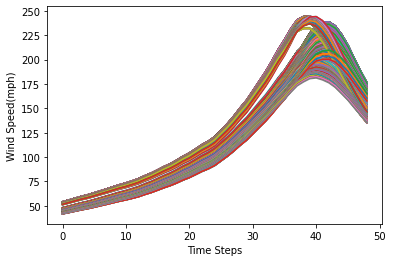

In [12]:
# Plotting wind intensities over 24 hours of time-span for each building
VG1.plot.line(legend=None)
plt.xlabel('Time Steps')
plt.ylabel('Wind Speed(mph)')

### 4. Damage Simulation

In [13]:
#Assign random seed
seed=1234
np.random.seed(seed)

In [14]:
#Building invetory dataframe (each building point considered as a node for simplification)
node = BlgW
node.head(2)

,x,y,Z,id,index,OBJECTID,Type,Shape_Le,Area_ft2,Update_Y,...,YEARBUIL,BASEMENT,STORYHEIGHT,HEATEDSQUA,STRUCTURES1,STRUCTURET,HAZUS,type,STRUCTURES,mph
0,77.518615,34.441515,0,1,1.0,17196,Building New,274.566915,3326.702519,2016,...,2003.0,NONE,2,6980,Beach Townhome,HARD BOARD (HARDY BOARD),C26,C26,Beach Townhome,130.519559
1,77.517539,34.441661,0,2,2.0,17197,Building New,156.050220,1446.453330,2016,...,1962.0,NONE,1,1214,Beach House,CEDAR/REDWOOD/CYPRESS,A70,A70,Beach House,130.542592


In [15]:
# Performing stochastic damage simulation and assign damage state to each building
%run -i Damage_Simulation.py

In [16]:
# dataframe with damage analysis results
df_dmg.head()

,x,y,Z,id,index,OBJECTID,Type,Shape_Le,Area_ft2,Update_Y,...,type,STRUCTURES,mph,DS1,DS2,DS3,DS4,dmg_state,kmh,Dislocation
0,77.518615,34.441515,0,1,1.0,17196,Building New,274.566915,3326.702519,2016,...,C26,Beach Townhome,130.519559,0.936602,0.759378,0.434744,0.132643,3,210.136490,1
1,77.517539,34.441661,0,2,2.0,17197,Building New,156.050220,1446.453330,2016,...,A70,Beach House,130.542592,0.632517,0.10914,0.005296,0.000144,1,210.173574,0
2,77.518484,34.441721,0,3,3.0,17198,Building New,185.065047,1805.217729,2016,...,A2,Beach House,130.514884,0.81777,0.402706,0.068854,0.006849,2,210.128963,0
3,77.518277,34.441771,0,4,4.0,17199,Building New,116.684847,809.593414,2016,...,A18,Beach House,130.518491,0.953947,0.787561,0.419454,0.147695,3,210.134770,1
4,77.518807,34.441739,0,5,5.0,17200,Building New,274.565998,3326.708935,2016,...,C26,Beach Townhome,130.505499,0.936506,0.75912,0.434359,0.132412,2,210.113853,0


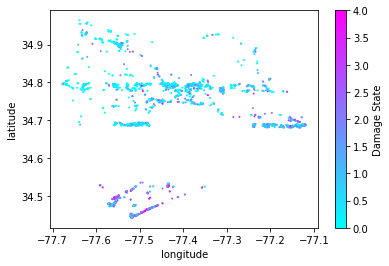

In [17]:
#Plotting Damage States
x = df_dmg.x*1
y = df_dmg.y
fig = plt.figure(figsize=(6,4))
plt.scatter(-x, y, c=df_dmg.dmg_state, s=1)
plt.cool()
plt.colorbar(label='Damage State')
# plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
# plt.title('Damage States');
plt.show()

In [18]:
# Saving damage analysis result
df_dmg.to_csv('Results/Damage_Output.csv')

#### Damage Ratio and Cost Analysis

In [19]:
# Estimate damage ratio for buildings and subsequent repair cost prediction
%run -i Cost_Analysis.py

In [20]:
#Total Cost in Millon $USD
sum(RCost)/1000000

201.79571370446456

In [21]:
#Total Cost in Millon $USD
sum(DRatio)/1000000

0.00027226794505693703

In [22]:
V3=list(df_dmg.id)
x=list(-df_dmg.x)
y=list(df_dmg.y)
vv= list(DRatio)
pf = {'id':V3,'x':x, 'y':y,'DR':vv}
dr=pd.DataFrame(pf)

In [23]:
# Saving expected damage ratio estimate outcome
dr.to_csv('Results/Damage_Ratio.csv')

### 5. Social Impact Estimation

In [24]:
# no. of dislocated buildings
n_dis=df_dmg[df_dmg.dmg_state>2].shape[0]

# no. of dislocated persons
dis_percent=df_dmg[df_dmg.dmg_state>2].shape[0]/df_dmg.dmg_state.value_counts().sum()
n_dis, dis_percent

(292, 0.07529654461062403)

In [25]:
# no. of damaged buildings
n_damaged=df_dmg.dmg_state.value_counts().sum()-df_dmg[df_dmg.dmg_state==0].shape[0]
# damaged households(%)
d_percent=1-(df_dmg[df_dmg.dmg_state==0].shape[0]/df_dmg.dmg_state.value_counts().sum())
n_damaged, d_percent

(1986, 0.5121196493037647)

In [26]:
#Sort Res Building DataFrame
res=df_dmg[df_dmg.STRUCTURES.isin(['Single Family','Multi-Section MH','Beach House','Singlewide M/H','Duplex','Town Home','Beach Duplex',
                            'Condominium','Beach Townhome','Multi-Family','Beach Condo','Apartment','Mixed Use Res/Com'])]

In [27]:
#Sort Office Buildings
office=df_dmg[df_dmg.STRUCTURES.isin(['RETAIL','OFFICES/SERVICES','AUTO SERVICE','WAR_S','WAR_D','SPECIAL/INSTITUTIONAL',
                                'RESTAURANT','PUBLIC BUILDINGS','MEDICAL BUILDING','CONVERSION','MOTEL','PS','DC',
                                'K12','THEATER/RECREATION'])]

In [28]:
# office buildings need to be dislocated
dis_office=office[office.dmg_state>2]
dis_office.shape

(145, 34)

In [29]:
#Sort School Buildings
school=df_dmg[df_dmg.STRUCTURES.isin(['PS','DC','K12'])]
school.shape

(50, 34)

In [30]:
# school buildings need to be dislocated 
dis_school=school[school.dmg_state>2]
dis_school.shape

(7, 34)

In [31]:
#No. of total Buildings
t_building=res.shape[0]+office.shape[0]
t_building

3878

#### 5.1 Dislocated population

In [32]:
# residential buildings need to be dislocated
dis_res=res[res.dmg_state>2]
dis_res.shape

(147, 34)

In [33]:
#No. of dislocated Units
No_dis_unit=dis_res['No. of housing units'].sum()
No_dis_unit

164

In [34]:
# No. of dislocated population
No_dis_ppl=dis_res['No. of housing units'].sum()*2.72
No_dis_ppl

446.08000000000004

#### 5.2 Employment disruption

In [35]:
# Sort buildings that need to be dislocated
dlo=df_dmg[df_dmg.dmg_state>2]

In [36]:
# Estimate no. of employment by building classes
n_cov=(dlo[(dlo.STRUCTURES=='CONVERSION')].Area_ft2/750).round(0).sum()
n_pub=(dlo[(dlo.STRUCTURES=='PUBLIC BUILDINGS')].Area_ft2/750).round(0).sum()
n_spe=(dlo[(dlo.STRUCTURES=='SPECIAL/INSTITUTIONAL')].Area_ft2/3000).round(0).sum()
n_the=(dlo[(dlo.STRUCTURES=='THEATER/RECREATION ')].Area_ft2/1500).round(0).sum()
n_auto=(dlo[(dlo.STRUCTURES=='AUTO SERVICE')].Area_ft2/600).round(0).sum()
n_htl=(dlo[(dlo.STRUCTURES=='HOTEL/CLUB')].Area_ft2/1500).round(0).sum()
n_mdl=(dlo[(dlo.STRUCTURES=='MEDICAL BUILDING')].Area_ft2/225).round(0).sum()
n_mtl=(dlo[(dlo.STRUCTURES=='MOTEL')].Area_ft2/1500).round(0).sum()
n_off=(dlo[(dlo.STRUCTURES=='OFFICES/SERVICES')].Area_ft2/250).round(0).sum()
n_res=(dlo[(dlo.STRUCTURES=='RESTAURANT')].Area_ft2/435).round(0).sum()
n_ret=(dlo[(dlo.STRUCTURES=='RETAIL')].Area_ft2/550).round(0).sum()
n_dc=(dlo[(dlo.STRUCTURES=='DC')].Area_ft2/630).round(0).sum()
n_12=(dlo[(dlo.STRUCTURES=='K12')].Area_ft2/1300).round(0).sum()
n_ps=(dlo[(dlo.STRUCTURES=='PS')].Area_ft2/2100).round(0).sum()
n_wd=(dlo[(dlo.STRUCTURES=='WAR_D')].Area_ft2/2500).round(0).sum()
n_ws=(dlo[(dlo.STRUCTURES=='WAR_S ')].Area_ft2/20000).round(0).sum()

In [37]:
# No. of employment impacted
N_uEmy=n_cov+n_pub+n_spe+n_the+n_auto+n_htl+n_mdl+n_mtl+n_off+n_res+n_ret+n_dc+n_12+n_ps+n_wd+n_ws
N_uEmy

1950.0

#### 5.3 Education Closure

In [38]:
#Num of Students Impacted
s_ds=(dlo[(dlo.STRUCTURES=='DC')].Area_ft2/550).round(0).sum()
s_12=(dlo[(dlo.STRUCTURES=='K12')].Area_ft2/140).round(0).sum()
s_ps=(dlo[(dlo.STRUCTURES=='PS')].Area_ft2/150).round(0).sum()
N_sImp=s_ds+s_12+s_ps
N_sImp

1035.0

In [39]:
end = time.time()

In [40]:
t_time=end-start
print ('Total Analysis time:', t_time/60, 'min')

Total Analysis time: 0.20517365137736002 min


#### 6. Plotting Results Interactively

In [41]:
# Plot output data interactively
%run -i Plot.py

In [42]:
#Plotting damage states map (Blue: None & Slight, Green: Slight, Yellow: Severe, Red: Complete Damage)
m